In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2

Using gradient masks

<Figure size 640x480 with 0 Axes>

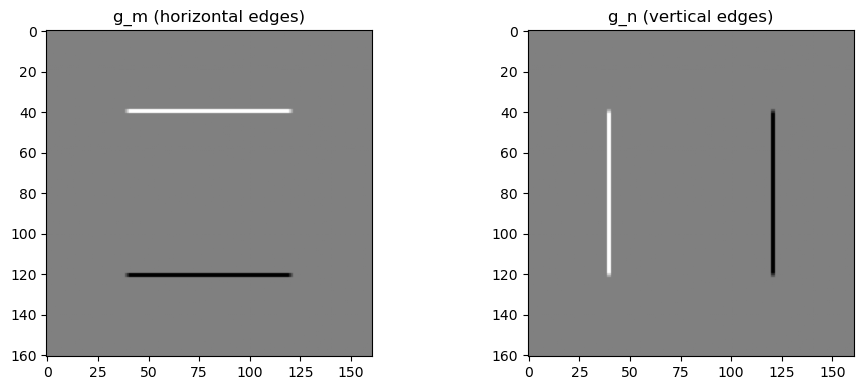

In [5]:
# Load image and define filters
square = np.load('square.npy')
h_m = np.asarray([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype='float') / 6.0
h_n = np.asarray([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype='float') / 6.0

# Convolve
g_m = conv2(square, h_m, mode='same')
g_n = conv2(square, h_n, mode='same')

# Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(g_m, cmap='gray')
plt.title("g_m (horizontal edges)")

plt.subplot(1, 2, 2)
plt.imshow(g_n, cmap='gray')
plt.title("g_n (vertical edges)")

plt.tight_layout()
plt.show()

now i'll try to plot the gradient field

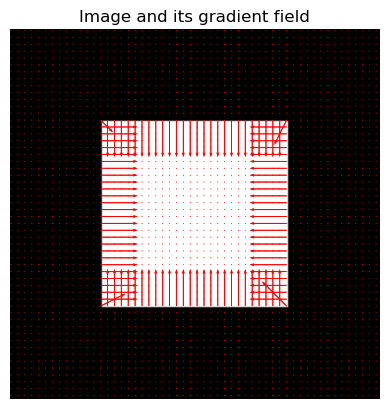

In [8]:
square=np.load('square.npy')
h_m = np.asarray([[1, 1, 1],[0, 0, 0],[-1, -1, -1]],
                 dtype='float')/6.0
h_n = np.asarray([[1, 0, -1],[1, 0, -1],[1, 0, -1]], 
                 dtype='float')/6.0
gm = conv2(square,h_m,'same')
gn = conv2(square,h_n,'same')
M,N = np.shape(square)
skip = 3
xgrid = range(0,N)
ygrid = range(0,M)
x,y = np.meshgrid(xgrid,ygrid)
plt.imshow(square,cmap='gray')
plt.quiver(x[::skip,::skip],y[::skip,::skip],
           gn[::skip,::skip],
           -gm[::skip,::skip],
           color='r',
           scale=50)
plt.axis('off')
plt.title('Image and its gradient field')
plt.show()

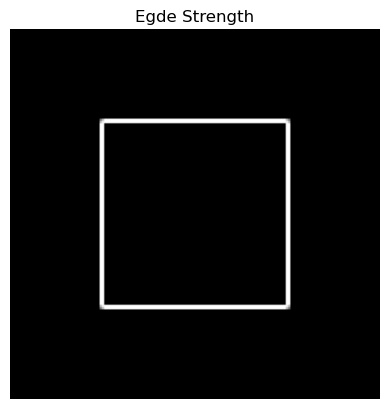

In [10]:
# finding magnitude of gradient field
g = np.sqrt(gm**2 + gn**2)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.title('Egde Strength')
plt.show()

ok now lets try with a circle

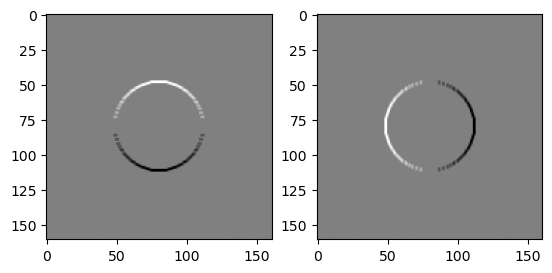

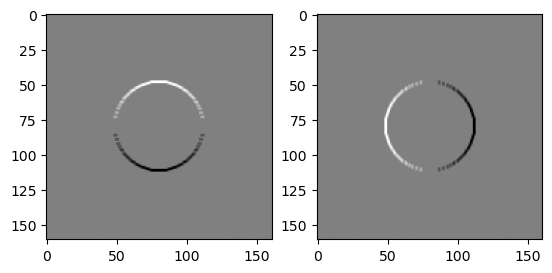

In [12]:
circle=np.load('circle.npy')
h_m = np.asarray([[1, 1, 1],[0, 0, 0],[-1, -1, -1]],
                 dtype='float')/6.0
h_n = np.asarray([[1, 0, -1],[1, 0, -1],[1, 0, -1]], 
                 dtype='float')/6.0
gm = conv2(circle,h_m,'same')
gn = conv2(circle,h_n,'same')
fig,axs = plt.subplots(1,2)
axs[0].imshow(gm,cmap='gray')
axs[1].imshow(gn,cmap='gray')
plt.show()

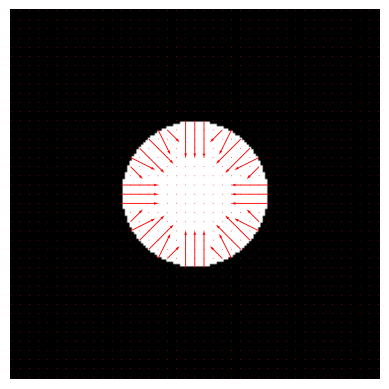

In [13]:
M,N = np.shape(circle)
skip = 4
xgrid = range(0,N)
ygrid = range(0,M)
x,y = np.meshgrid(xgrid,ygrid)
plt.imshow(circle,cmap='gray')
plt.quiver(x[::skip,::skip],y[::skip,::skip],
           gn[::skip,::skip],
           -gm[::skip,::skip],
           color='r',
           scale=5)
plt.axis('off')
plt.show()

Now I will be experimenting with a Gaussian Blur

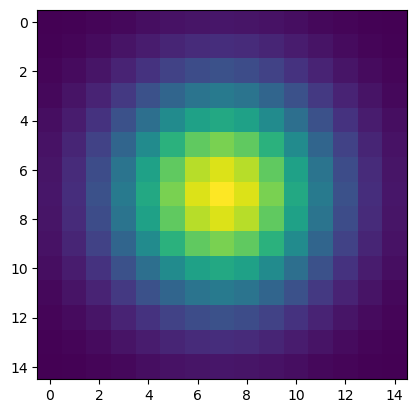

In [15]:
# I've chosen a value for sigma, sort of at random 
sigma=3
x,y = np.meshgrid(range(-7,8),range(-7,8))
rsquared = x**2+y**2

# Gaussian is computed below
Gauss = np.exp(-rsquared/(2*sigma**2))/(2*np.pi*sigma**2)
Gauss = Gauss/np.sum(Gauss)

# Visualising the Gaussian
plt.imshow(Gauss)
plt.show()

Using matplotlib backend: inline


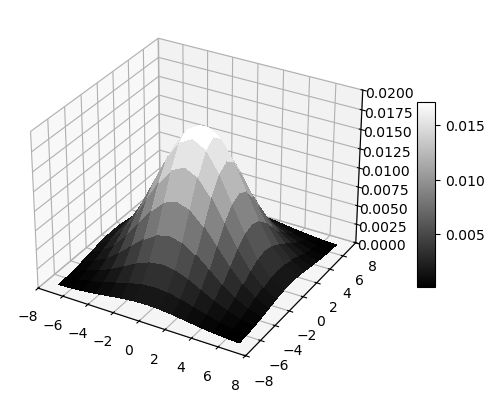

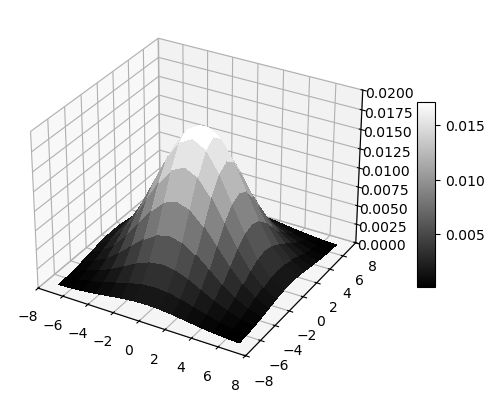

In [17]:
# Visualing the gaussian as a smoothing function
%matplotlib
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = x
Y = y

surf = ax.plot_surface(X, Y, Gauss,
                       linewidth=0, antialiased=False, cmap='gray')
ax.set_zlim(0, 0.02)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

I now redo the gradient vector field plot of the circle, but this time, blur the circle image first with a Gaussian with a $\sigma$ of 3. This is sometimes described as _regularising_ the gradient calculation. 

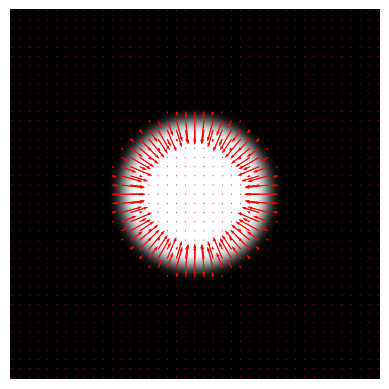

In [19]:
%matplotlib inline
circle=np.load('circle.npy')
blurredcircle = conv2(circle,Gauss,'same')
h_m = np.asarray([[1, 1, 1],[0, 0, 0],[-1, -1, -1]],
                 dtype='float')/6.0
h_n = np.asarray([[1, 0, -1],[1, 0, -1],[1, 0, -1]], 
                 dtype='float')/6.0
gm = conv2(blurredcircle,h_m,'same')
gn = conv2(blurredcircle,h_n,'same')

M,N = np.shape(blurredcircle)
skip = 4
xgrid = range(0,N)
ygrid = range(0,M)
x,y = np.meshgrid(xgrid,ygrid)
plt.imshow(blurredcircle,cmap='gray')
plt.quiver(x[::skip,::skip],y[::skip,::skip],
           gn[::skip,::skip],
           -gm[::skip,::skip],
           color='r',
           scale=2)
plt.axis('off')
plt.show()